In [167]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns

import warnings

# pd.set_option('display.max_rows', 10)

warnings.filterwarnings('ignore')

---------------
# Dados de exportação de vinho do Brasil do Brasil - http://vitibrasil.cnpuv.embrapa.br

In [168]:
df_exp_brasil = pd.read_csv('ExpVinho.csv', sep=';')
df_exp_brasil = df_exp_brasil.iloc[:, 1:]

df_exp_brasil

,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,Afeganistão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,África do Sul,0,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,0,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,Angola,0,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
4,Anguilla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Tuvalu,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,4,0,0,0,0
124,Uruguai,0,0,0,0,0,0,0,0,0,...,7711,29617,6180,18497,0,0,136774,149842,637117,997367
125,Vanuatu,0,0,0,0,0,0,0,0,0,...,0,0,0,0,18,31,0,0,0,0
126,Venezuela,0,0,3200,2000,1350,750,11700,6458,9830,...,71,355,0,0,4086,9808,26415,35944,23220,32351


### >> Exportações do Brasil em litros

In [277]:
df_exp_brasil_litros = pd.concat([df_exp_brasil["País"], df_exp_brasil[df_exp_brasil.iloc[:,1::2].columns]], axis=1)
df_exp_brasil_litros = df_exp_brasil_litros.rename(columns={"País": "Region/Country"})
df_exp_brasil_litros.set_index("Region/Country", inplace=True)
df_exp_brasil_litros = df_exp_brasil_litros.iloc[:,-23:]
df_exp_brasil_litros['Total'] = df_exp_brasil_litros.sum(numeric_only=True, axis=1)



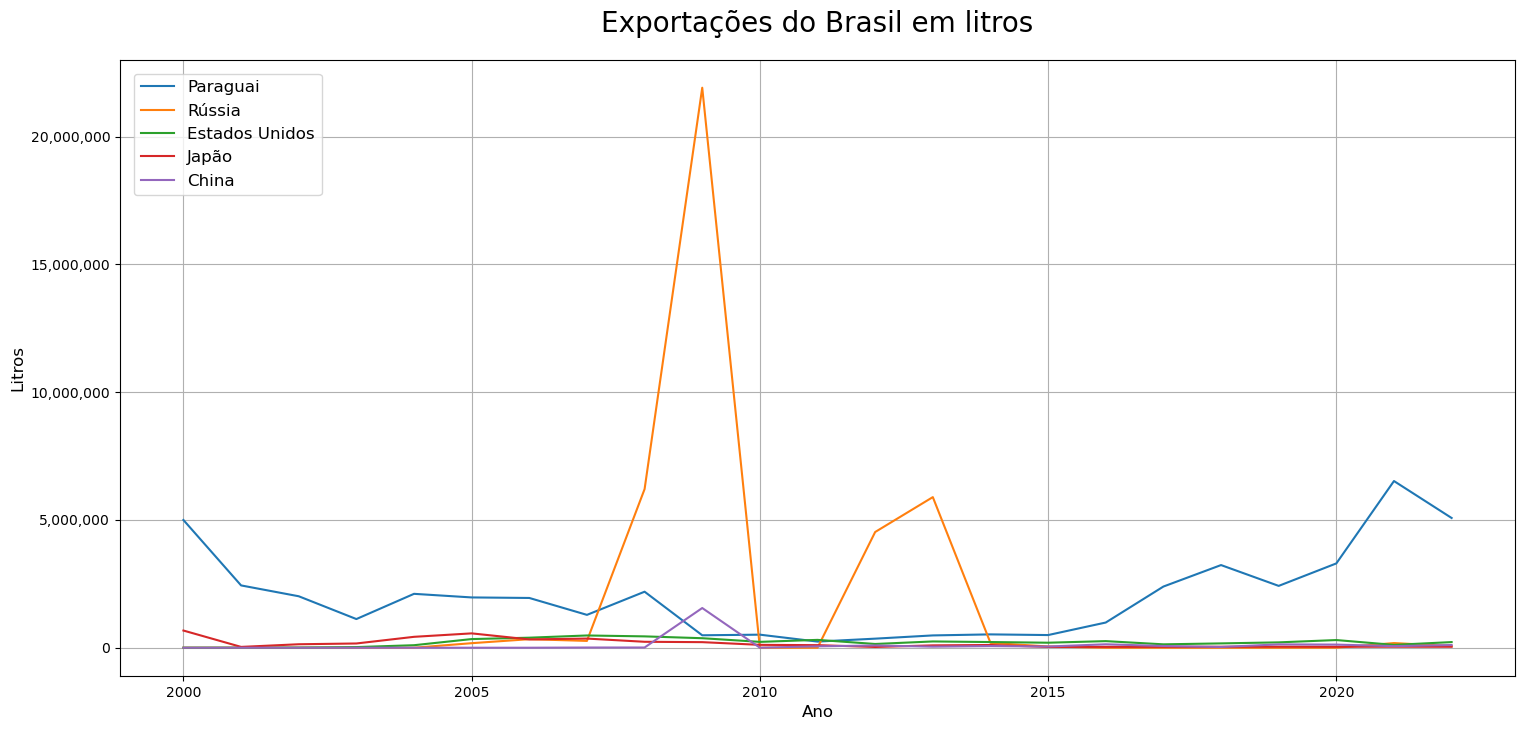

In [278]:

df_plot = df_exp_brasil_litros.sort_values(by="Total", ascending=False).head(5).iloc[:,0:-1].T
axis = df_plot.plot(figsize=(18,8))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
axis.set_xlabel('Ano', fontsize=12)
axis.set_ylabel('Litros', fontsize=12)
axis.legend(loc=[0.01,0.78] , fontsize=12)
plt.title("Exportações do Brasil em litros", fontsize=20, pad=20)
axis.grid(True)
plt.show()

In [266]:
df_exp_brasil_litros.sort_values(by="Total", ascending=False).head(5)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
Region/Country,,,,,,,,,,,,,,,,,,,,,
Paraguai,4997801,2437964,2013803,1121672,2108658,1967909,1947106,1285459,2191901,486927,...,521847,495428,985739,2393468,3234168,2419537,3299013,6522527,5076670,115543747
Estados Unidos,2151,3576,6800,25467,98265,338497,392590,479269,443895,372319,...,222267,195896,258072,132688,169109,209765,300178,111085,220373,55258958
Rússia,0,0,0,0,0,177600,334200,266400,6207658,21912914,...,190656,47664,0,0,0,0,1463,181931,66046,39808014
Japão,672280,32073,135602,166028,426482,561411,325031,357943,232293,217974,...,106426,31597,34341,33909,36992,40621,36442,39491,37324,8198936
Angola,249717,12150,9812,19937,37573,24056,3766,25931,25721,54786,...,12182,1908,7359,10170,477,345,0,0,4068,5819857


### >> Exportações do Brasil em USD

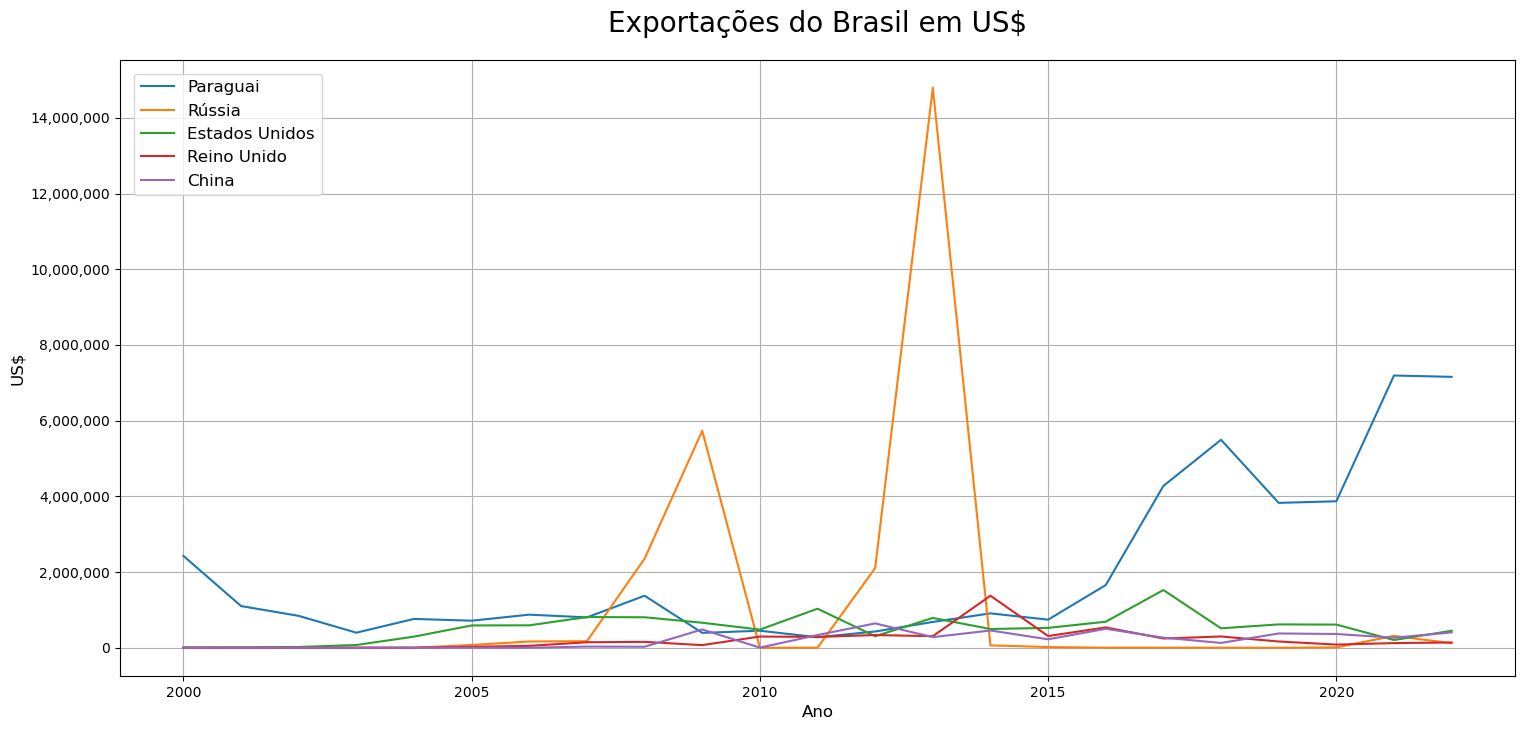

In [279]:
df_exp_brasil_valor = df_exp_brasil[df_exp_brasil.iloc[:,0::2].columns]
df_exp_brasil_valor.columns = df_exp_brasil_valor.columns.str[0:4]
df_exp_brasil_valor = df_exp_brasil_valor.rename(columns={"País": "Region/Country"})
df_exp_brasil_valor.set_index("Region/Country", inplace=True)
df_exp_brasil_valor = df_exp_brasil_valor.iloc[:,-23:]
df_exp_brasil_valor['Total'] = df_exp_brasil_valor.sum(numeric_only=True, axis=1)

df_plot = df_exp_brasil_valor.sort_values(by="Total", ascending=False).head(5).iloc[:,0:-1].T
axis = df_plot.plot(figsize=(18,8))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
axis.set_xlabel('Ano', fontsize=12)
axis.set_ylabel('US$', fontsize=12)
axis.legend(loc=[0.01,0.78] , fontsize=12)
plt.title("Exportações do Brasil em US$", fontsize=20, pad=20)
axis.grid(True)
plt.show()

### >> Exportações do Brasil, preço por litro série histórica

In [172]:
df_exp_brasil_preco_litro = df_exp_brasil_valor / df_exp_brasil_litros
df_exp_brasil_preco_litro = df_exp_brasil_preco_litro.fillna(0)


In [173]:
df_exp_brasil_preco_litro

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
Region/Country,,,,,,,,,,,,,,,,,,,,,
Afeganistão,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.181818,0.000000,4.181818
África do Sul,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.653846,5.250000,0.000000,0.000000,3.628803
"Alemanha, República Democrática",1.577778,6.668858,4.283333,0.000000,2.070793,1.859147,2.329669,1.991867,1.617998,1.748141,...,3.570003,4.192884,4.860762,5.670266,4.204373,6.958197,5.207635,2.498517,5.945872,2.588377
Angola,1.476940,1.278107,0.539136,0.573657,1.340910,1.373420,4.857408,1.918669,2.763617,1.537528,...,1.898210,8.956499,4.809077,6.064897,1.486373,3.086957,0.000000,0.000000,1.170354,0.835044
Anguilla,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.409692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000
Uruguai,0.676207,0.488862,0.365923,0.383755,0.591049,0.000000,1.671627,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.840877,2.993042,0.000000,1.095544,1.565438,1.244650
Vanuatu,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.722222,0.000000,0.000000,1.722222


### >> Exportações do Brasil - 20 Países com maior preço médio em 2022, quantidade em litros

In [174]:
df_exp_brasil_preco_medio = df_exp_brasil_litros
df_exp_brasil_preco_medio["Preço Médio 2022"] = round(df_exp_brasil_valor["2022"] / df_exp_brasil_litros["2022"], ndigits=2)
#sns.histplot(data=df_exp_brasil_preco_medio, x='Region/Country', bins=30, kde=True, color='g')
df_2022_pm = df_exp_brasil_preco_medio.sort_values(by=["Preço Médio 2022"], ascending=False).head(20).iloc[:,-3:]
df_2022_pm.drop("Total", axis=1, inplace=True)
df_2022_pm

,2022,Preço Médio 2022
Region/Country,,
Áustria,6,35.33
Luxemburgo,36,22.28
Emirados Arabes Unidos,4781,17.88
Noruega,2711,14.87
Croácia,34,14.24
Suíça,1584,13.17
Bangladesh,7,12.00
Taiwan (FORMOSA),25,11.08
Austrália,1424,8.64


In [175]:
df_2022_l = df_exp_brasil_preco_medio.sort_values(by=["2022"], ascending=False).head(20).iloc[:,-3:]
df_2022_l.drop("Total", axis=1, inplace=True)

df_2022_l

,2022,Preço Médio 2022
Region/Country,,
Paraguai,5076670,1.41
Uruguai,637117,1.57
Haiti,553503,1.34
Estados Unidos,220373,2.03
China,105395,3.84
Rússia,66046,1.80
Curaçao,40673,1.65
Japão,37324,2.20
Gana,35949,1.37


---------------
# Dados da International Organisation of Vine and Wine - https://www.oiv.int

In [228]:
# Data frame com os dados da OIV
df_oiv = pd.read_csv('OIV_Wine_Global_Data.csv', skiprows=1, skipfooter=2, sep=';')
df_oiv["Quantity"] = df_oiv["Quantity"].str.replace(" ", "").astype(int)
df_imports=df_oiv[df_oiv["Variable"] == 'Imports']
df_production=df_oiv[df_oiv["Variable"] == 'Production']
df_consumption=df_oiv[df_oiv["Variable"] == 'Consumption']
df_imports_america = df_imports[df_imports["Continent"] == "America"]
df_imports.sort_values(by="Quantity", ascending=False)


,Continent,Region/Country,Product,Variable,Year,Unit,Quantity
6347,Global,Global,Wine,Imports,2017,1000 hl,111010
6363,Global,Global,Wine,Imports,2021,1000 hl,108714
6355,Global,Global,Wine,Imports,2019,1000 hl,107465
6351,Global,Global,Wine,Imports,2018,1000 hl,105184
6339,Global,Global,Wine,Imports,2015,1000 hl,105162
...,...,...,...,...,...,...,...
14992,Asia,State of Palestine,Wine,Imports,2016,1000 hl,0
14995,Asia,State of Palestine,Wine,Imports,2017,1000 hl,0
14998,Asia,State of Palestine,Wine,Imports,2018,1000 hl,0
15001,Asia,State of Palestine,Wine,Imports,2019,1000 hl,0


In [229]:
# Importadores
df_imports_by_year = df_imports.pivot_table("Quantity", ["Continent", "Region/Country"], "Year")
df_imports_by_year = df_imports_by_year.fillna(0)
df_imports_by_year['Total'] = df_imports_by_year.sum(numeric_only=True, axis=1)
df_imports_by_year['Media'] = df_imports_by_year["Total"] / (2022 - 1995)
df_imports_10_mais = df_imports_by_year.sort_values(by="Total", ascending=False).head(40).drop(["Total", "Media"], axis=1)
# Produtores
df_production_by_year = df_production.pivot_table("Quantity", ["Continent", "Region/Country"], "Year")
df_production_by_year = df_production_by_year.fillna(0)
df_production_by_year['Total'] = df_production_by_year.sum(numeric_only=True, axis=1)
df_production_by_year['Media'] = df_production_by_year["Total"] / (2022 - 1995)
df_production_10_mais = df_production_by_year.sort_values(by="Total", ascending=False).head(11).drop(["Total", "Media"], axis=1)
# Consumidores
df_consumption_by_year = df_consumption.pivot_table("Quantity", ["Continent", "Region/Country"], "Year")
df_consumption_by_year = df_consumption_by_year.fillna(0)
df_consumption_by_year['Total'] = df_consumption_by_year.sum(numeric_only=True, axis=1)
df_consumption_by_year['Media'] = df_consumption_by_year["Total"] / (2022 - 1995)
df_consumption_10_mais = df_consumption_by_year.sort_values(by="Total", ascending=False).head(11).drop(["Total", "Media"], axis=1)


### >> 10 Paises maiores importadores de vinho no mundo em 1000 Litros

In [222]:
df_imports_10_mais.iloc[1:]
#df_imports_10_mais.T.info()

Year                                  1995     1996    1997     1998     1999  \
Continent Region/Country                                                        
Europe    Germany                   8771.0  10719.0  9855.0  11631.0  11854.0   
          United Kingdom            7357.0   7461.0  8022.0   8859.0   8764.0   
America   United States of America  2753.0   3472.0  4452.0   4004.0   4072.0   
Europe    France                    6127.0   5306.0  5826.0   5824.0   5748.0   
          Russia                    4601.0   2041.0  2434.0   2911.0   1128.0   
          Netherlands               2347.0   2165.0  2780.0   2926.0   3388.0   
America   Canada                    1477.0   1698.0  1784.0   2030.0   2195.0   
Asia      China                        7.0     44.0   336.0    462.0    437.0   
Europe    Belgium                      0.0      0.0     0.0      0.0      0.0   
Asia      Japan                     1077.0   1074.0  1452.0   3225.0   1898.0   
Europe    Denmark                   1298.0   1473.0  1683.0   1699.0   1677.0   
          Switzerland               1880.0   1852.0  1853.0   1885.0   1895.0   
          Portugal                   881.0    622.0   454.0   1610.0   2408.0   
          Sweden                     874.0   1144.0  1060.0   1121.0   1214.0   
          Italy                      178.0    289.0   644.0    863.0    456.0   
          Czech Republic             335.0    518.0   711.0    496.0    534.0   
          Poland                     316.0    484.0   483.0    508.0    628.0   
          Norway                     320.0    366.0   420.0    433.0    480.0   
America   Brazil                     279.0    234.0   253.0    241.0    284.0   
Europe    Spain                     2521.0   1143.0   148.0    894.0   1367.0   
Africa    Angola                     255.0    280.0   458.0    539.0    236.0   
Europe    Ireland                    178.0    266.0   292.0    316.0    413.0   
          Austria                    237.0    248.0   518.0    314.0    565.0   
Oceania   Australia                  141.0    141.0   207.0    284.0    243.0   
Europe    Finland                    267.0    264.0   268.0    308.0    327.0   
          Lithuania                  105.0    156.0   172.0    163.0    186.0   
          Belgium and Luxemburg     2299.0   2180.0  2283.0   2520.0   2419.0   
          Slovakia                   181.0    170.0    98.0     44.0     79.0   
          Latvia                     165.0    121.0   129.0    103.0    101.0   
America   Mexico                      48.0     73.0   119.0    114.0    137.0   
Europe    Belarus                    190.0     90.0    26.0     84.0     54.0   
Oceania   New Zealand                209.0    225.0   224.0    276.0    409.0   
Asia      Hong Kong                   57.0    106.0   341.0    208.0    103.0   
Europe    Ukraine                    418.0    130.0   230.0    193.0     69.0   
Africa    Côte d'Ivoire              179.0    221.0   232.0    240.0    230.0   
Europe    Romania                    139.0     56.0     7.0     76.0     80.0   
Asia      Korea (the Republic of)     57.0     59.0   102.0     26.0     58.0   
America   Paraguay                   293.0     92.0    92.0     43.0    107.0   
Asia      Singapore                   60.0     65.0    82.0     68.0     92.0   

Year                                  2000     2001     2002     2003  \
Continent Region/Country                                                
Europe    Germany                   9922.0  11268.0  11710.0  11906.0   
          United Kingdom            9080.0  10161.0  11066.0  11307.0   
America   United States of America  4479.0   4688.0   5460.0   6082.0   
Europe    France                    5502.0   5136.0   4588.0   4799.0   
          Russia                    1623.0   2568.0   2985.0   4164.0   
          Netherlands               3200.0   3121.0   3590.0   3059.0   
America   Canada                    2358.0   2388.0   2437.0   2697.0   
Asia      China      

<Axes: xlabel='Year'>

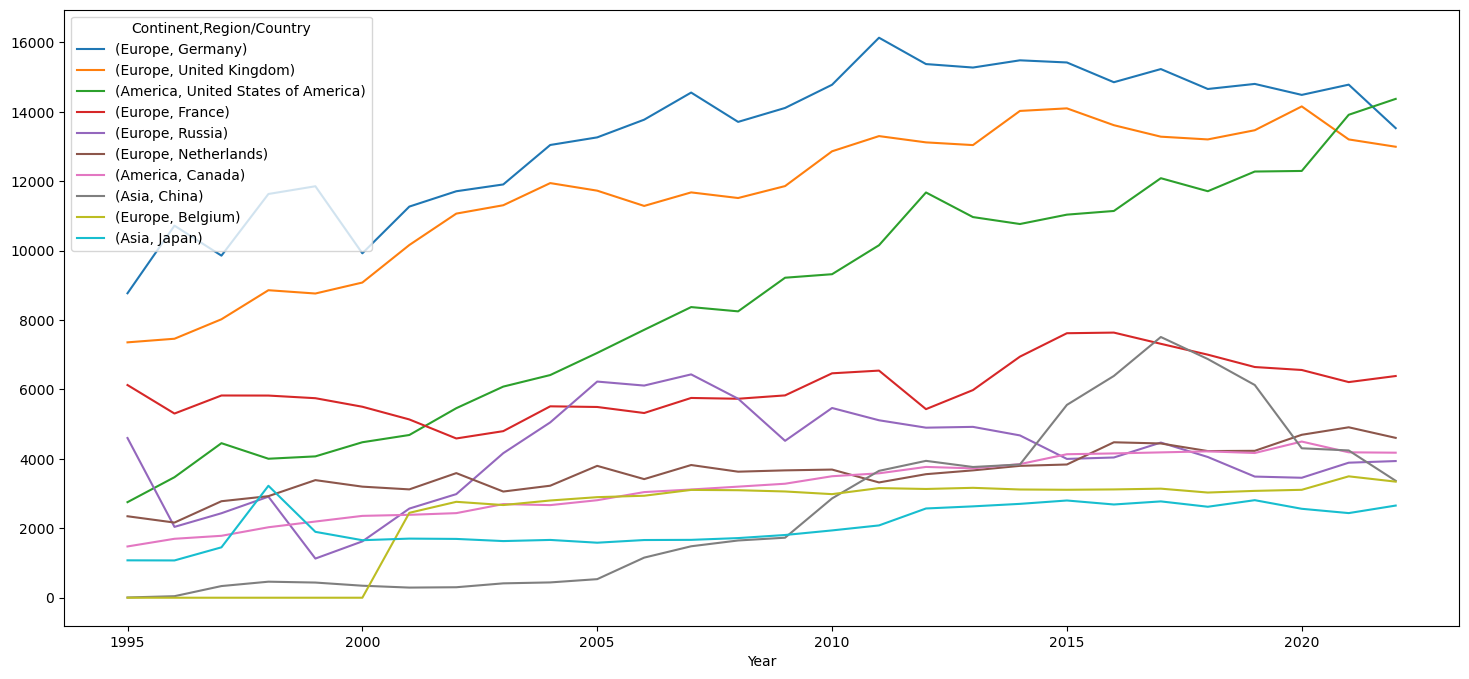

In [179]:
df_imports_10_mais.iloc[1:].T.plot(figsize=(18, 8))

### >> 10 Paises maiores produtores de vinho no mundo em 1000 Litros

In [180]:
df_production_10_mais.iloc[1:,:-1]

Year                                   1995     1996     1997     1998  \
Continent Region/Country                                                 
Europe    Italy                     55702.0  58772.0  50894.0  54188.0   
          France                    54354.0  57047.0  53561.0  52671.0   
          Spain                     20876.0  31000.0  33218.0  31175.0   
America   United States of America  18668.0  18877.0  22000.0  20504.0   
          Argentina                 16443.0  12681.0  13500.0  12673.0   
Oceania   Australia                  5028.0   6734.0   6174.0   7415.0   
Asia      China                      7000.0   7500.0   9000.0  10645.0   
Africa    South Africa               8339.0   8451.0   8115.0   7703.0   
America   Chile                      3164.0   3824.0   4549.0   5475.0   
Europe    Germany                    8510.0   8642.0   8495.0  10834.0   

Year                                   1999     2000     2001     2002  \
Continent Region/Country                                                 
Europe    Italy                     56454.0  51620.0  49865.0  42507.0   
          France                    60535.0  57541.0  53389.0  50353.0   
          Spain                     33723.0  41692.0  30500.0  33478.0   
America   United States of America  19050.0  21500.0  19200.0  20300.0   
          Argentina                 15888.0  12537.0  15835.0  12695.0   
Oceania   Australia                  8511.0   8064.0  10731.0  12168.0   
Asia      China                     10261.0  10500.0  10800.0  11200.0   
Africa    South Africa               7968.0   6949.0   6471.0   7189.0   
America   Chile                      4807.0   6674.0   5452.0   5623.0   
Europe    Germany                   12123.0   9852.0   8891.0   9885.0   

Year                                   2003     2004  ...     2013     2014  \
Continent Region/Country                              ...                     
Europe    Italy                     41807.0  49935.0  ...  54029.0  44229.0   
          France                    46360.0  57386.0  ...  42134.0  46534.0   
          Spain                     41843.0  42988.0  ...  45308.0  39494.0   
America   United States of America  19500.0  20109.0  ...  25584.0  24253.0   
          Argentina                 13225.0  15464.0  ...  14984.0  15197.0   
Oceania   Australia                 10835.0  14679.0  ...  12310.0  11863.0   
Asia      China                     11600.0  11700.0  ...  13693.0  13496.0   
Africa    South Africa               8853.0   9279.0  ...  10982.0  11460.0   
America   Chile                      6682.0   6301.0  ...  12821.0   9896.0   
Europe    Germany                    8191.0  10007.0  ...   8409.0   9202.0   

Year                                   2015     2016     2017     2018  \
Continent Region/Country                                                 
Europe    Italy                     49996.0  50920.0  42500.0  54783.0   
          France                    47775.0  45367.0  36605.0  49186.0   
          Spain                     37703.0  39970.0  32480.0  44933.0   
America   United States of America  22818.0  24901.0  24506.0  26074.0   
          Argentina                 13362.0   9447.0  11821.0  14522.0   
Oceania   Australia                 11912.0  13100.0  13690.0  12740.0   
Asia      China                     13345.0  13217.0  11636.0   9269.0   
Africa    South Africa              11231.0  10531.0  10820.0   9503.0   
America   Chile                     12866.0  10143.0   9492.0  12898.0   
Europe    Germany                    8819.0   9013.0   7462.0  10268.0   

Year                                   2019     2020     2021     2022  
Continent Region/Country                                                
Europe    Italy                     47533.0  49066.0  50232.0  49843.0  
          France                    42324.0  46739.0  37753.0  45616.0  
          Spain                     33676.0  40949.0  35471.0  35703.0  
America   United St

<Axes: xlabel='Year'>

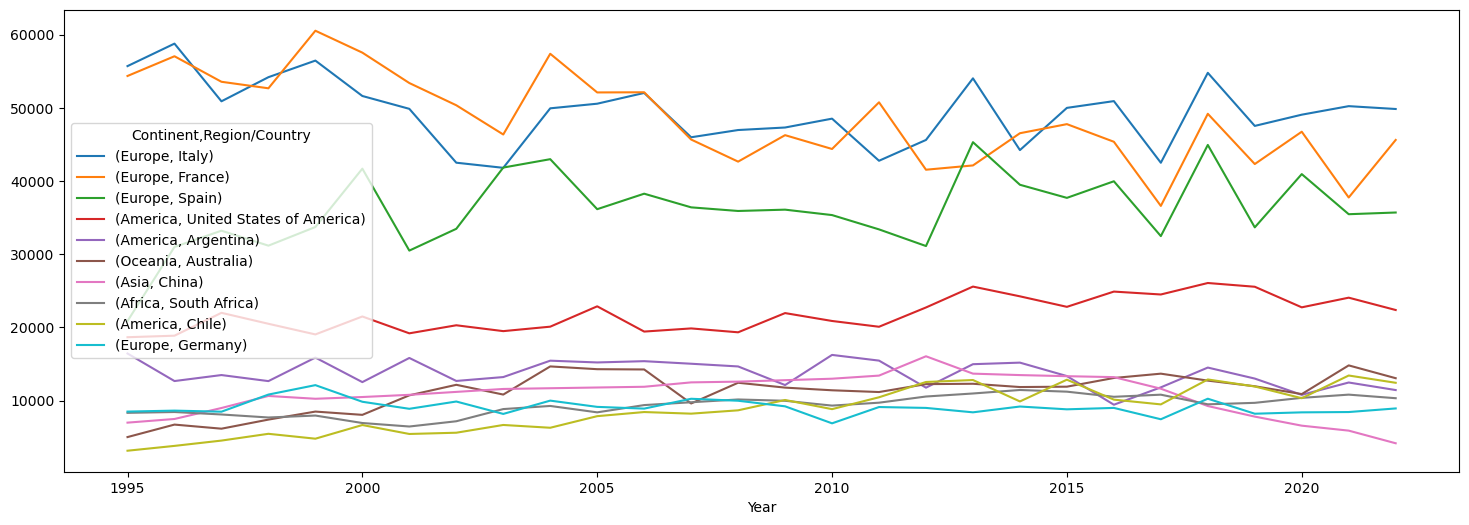

In [181]:
df_production_10_mais.iloc[1:,:-1].T.plot(figsize=(18,6))

### >> 10 Paises maiores consumidores de vinho no mundo em 1000 Litros

In [182]:
df_consumption_10_mais.iloc[1:]

Year                                   1995     1996     1997     1998  \
Continent Region/Country                                                 
Europe    France                    36515.0  34795.0  35500.0  36330.0   
America   United States of America  21765.0  20463.0  20800.0  20748.0   
Europe    Italy                     35623.0  34693.0  30855.0  31840.0   
          Germany                   18728.0  18730.0  18794.0  18970.0   
Asia      China                      6911.0   7439.0   9215.0  10964.0   
Europe    Spain                     15336.0  14459.0  14589.0  14793.0   
          United Kingdom             6303.0   6811.0   8148.0   8765.0   
America   Argentina                 13888.0  13365.0  13390.0  12683.0   
Europe    Russia                     6915.0   4309.0   5368.0   5082.0   
          Portugal                   5684.0   5443.0   5223.0   5055.0   

Year                                   1999     2000     2001     2002  \
Continent Region/Country                                                 
Europe    France                    35400.0  34500.0  33919.0  34820.0   
America   United States of America  20858.0  21200.0  21250.0  22538.0   
Europe    Italy                     31563.0  30800.0  30150.0  27709.0   
          Germany                   19751.0  20150.0  20044.0  20272.0   
Asia      China                     10546.0  10695.0  10952.0  11364.0   
Europe    Spain                     14249.0  14046.0  14238.0  13960.0   
          United Kingdom             9284.0   9696.0  10336.0  11222.0   
America   Argentina                 12567.0  12491.0  12036.0  11988.0   
Europe    Russia                     3365.0   4699.0   6067.0   6404.0   
          Portugal                   5054.0   4595.0   4697.0   4651.0   

Year                                   2003     2004  ...     2013     2014  \
Continent Region/Country                              ...                     
Europe    France                    34081.0  33218.0  ...  27770.0  27545.0   
America   United States of America  23801.0  24750.0  ...  31403.0  31687.0   
Europe    Italy                     29343.0  28300.0  ...  20800.0  19500.0   
          Germany                   19734.0  19845.0  ...  20400.0  20300.0   
Asia      China                     11993.0  12120.0  ...  18714.0  17369.0   
Europe    Spain                     14787.0  14330.0  ...   9820.0   9810.0   
          United Kingdom            11584.0  12742.0  ...  12738.0  12562.0   
America   Argentina                 12338.0  11113.0  ...  10352.0   9938.0   
Europe    Russia                     8682.0   9159.0  ...  10555.0   9881.0   
          Portugal                   5315.0   4913.0  ...   4164.0   4289.0   

Year                                   2015     2016     2017     2018  \
Continent Region/Country                                                 
Europe    France                    26452.0  28290.0  28634.0  26028.0   
America   United States of America  30318.0  30959.0  32695.0  33718.0   
Europe    Italy                     21400.0  22400.0  22600.0  22400.0   
          Germany                   20500.0  20200.0  19745.0  20000.0   
Asia      China                     18057.0  19162.0  19280.0  17568.0   
Europe    Spain                      9810.0  10578.0  10373.0  10741.0   
          United Kingdom            12781.0  12935.0  13148.0  12904.0   
America   Argentina                 10269.0   9416.0   8925.0   8396.0   
Europe    Russia                     9658.0   9370.0   9041.0   8615.0   
          Portugal                   4813.0   4686.0   5273.0   5073.0   

Year                                   2019     2020     2021     2022  
Continent Region/Country                                                
Europe    France                    24714.0  24361.0  23228.0  24872.0  
America   United States of America  34282.0  32854.0  33079.0  34344.0  
Europe    Italy                     22600.0  24200.0  24100.0  22300.0  
          Germany  

<Axes: xlabel='Year'>

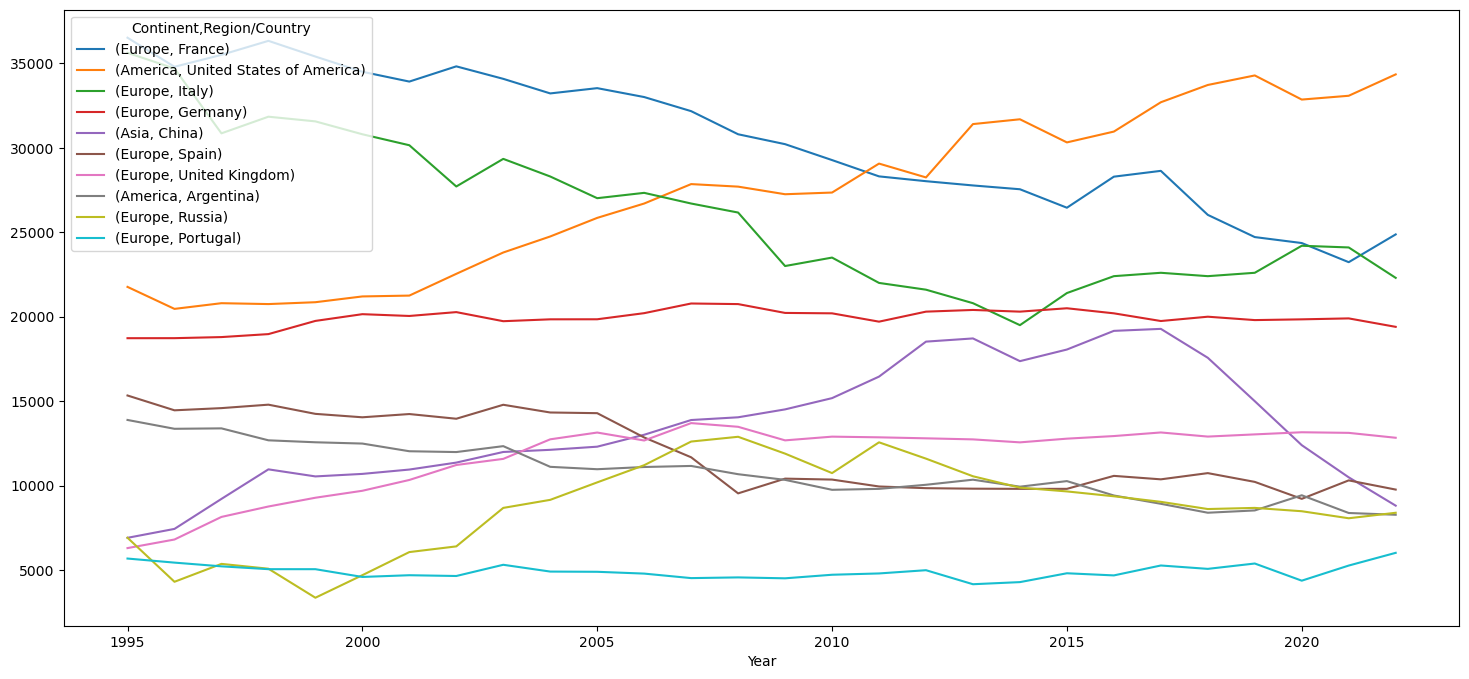

In [183]:
df_consumption_10_mais.iloc[1:].T.plot(figsize=(18,8))

### >> 10 Paises maiores importadores da America em 1000 Litros

In [184]:
# df_imports_america
df_imports_america_by_year = df_imports_america.pivot_table("Quantity", ["Continent", "Region/Country"], "Year").fillna(0)
df_imports_america_by_year['Total'] = df_imports_america_by_year.sum(numeric_only=True, axis=1)
df_imports_america_by_year['Media'] = df_imports_america_by_year["Total"] / (2022 - 1995)
df_imports_america_by_year = df_imports_america_by_year.sort_values(by="Media", ascending=False).head(10)

<Axes: xlabel='Year'>

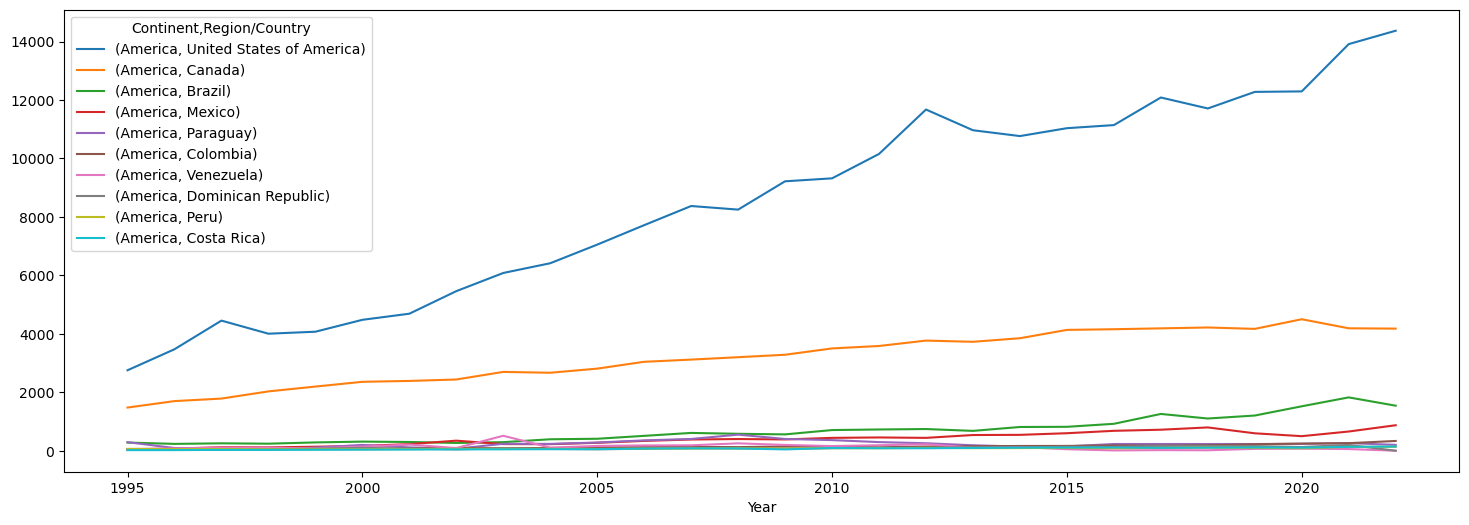

In [185]:
df_imports_america_by_year.iloc[:,:-2].T.plot(figsize=(18,6))

---------------
# Dados do World Bank - https://www.worldbank.org/en/home

### >> Dados de PIB per Capita

In [244]:
df_wdb_gdp_per_capita = pd.read_csv('GDP_Per_Capita_Data.csv', skipfooter=54)
df_wdb_gdp_per_capita = df_wdb_gdp_per_capita.drop(["Series Name", "Series Code", "Country Code"], axis=1)
df_wdb_gdp_per_capita.columns = df_wdb_gdp_per_capita.columns.str[0:4]
df_wdb_gdp_per_capita = df_wdb_gdp_per_capita.rename(columns={"Coun": "Region/Country"})
df_wdb_gdp_per_capita = df_wdb_gdp_per_capita.replace(to_replace="United States", value="United States of America")
df_wdb_gdp_per_capita = df_wdb_gdp_per_capita.replace(to_replace="Russian Federation", value="Russia")
df_wdb_gdp_per_capita = df_wdb_gdp_per_capita.replace("..", "0").fillna(0)
df_wdb_gdp_per_capita = df_wdb_gdp_per_capita.set_index("Region/Country")
df_wdb_gdp_per_capita = df_wdb_gdp_per_capita.astype(float)


In [246]:
df_wdb_gdp_per_capita.tail(20)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Region/Country,,,,,,,,,,,,,,,,,,,,,
Tunisia,0.000000,0.000000,0.000000,0.000000,0.000000,222.343486,228.832444,232.922370,253.848674,262.433825,...,4308.337421,4398.638695,3960.924849,3796.109011,3569.718839,3577.169460,3477.844271,3497.733231,3807.184563,3776.667779
Turkiye,274.525692,282.115541,306.624897,346.407297,363.551746,379.725674,436.319412,471.597837,514.181555,558.163025,...,12507.803158,12020.349659,10851.920107,10734.256469,10464.007790,9400.836337,9103.012397,8561.064333,9661.227734,10616.061045
Turkmenistan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7049.797505,7685.509859,6208.296655,6163.253406,6354.532830,6721.349540,7180.459552,7297.180042,0.000000,0.000000
Turks and Caicos Islands,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,22451.568733,24040.874661,25783.294105,26995.032160,25659.195864,26831.971461,27795.148561,20882.261270,23158.637895,24917.595806
Tuvalu,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3536.901175,3556.378789,3384.382534,3836.073071,4181.437569,4419.256323,4940.050682,4674.909088,5372.756766,5334.988605
Uganda,55.529337,56.328059,55.647806,62.104078,68.776819,100.180847,101.637300,102.969889,106.986352,116.779452,...,819.757867,897.509729,864.180059,753.684406,766.177604,793.128082,823.024733,846.881199,883.465728,964.224385
Ukraine,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4187.739746,3104.653809,2124.662598,2187.727539,2638.325439,3096.562500,3661.457764,3751.737305,4827.845703,4533.975586
United Arab Emirates,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,45729.607676,46865.964598,41525.138904,41054.539570,43063.967479,46722.268719,45376.170839,37629.174168,44315.554184,53757.863251
United Kingdom,1397.594863,1472.385777,1525.775918,1613.456953,1748.288193,1873.567855,1986.747244,2058.781771,1951.758666,2100.667944,...,43449.091717,47447.588932,45071.074323,41146.077356,40622.689388,43306.308305,42747.080460,40318.416923,46585.897564,45850.426122


### >> População por país

In [188]:
df_wdb_population = pd.read_csv('Population_Data.csv', skipfooter=5)
df_wdb_population = df_wdb_population.drop(["Series Name", "Series Code", "Country Code"], axis=1)
df_wdb_population.columns = df_wdb_population.columns.str[0:4]
df_wdb_population = df_wdb_population.rename(columns={"Coun": "Region/Country"})
df_wdb_population = df_wdb_population.replace("..", "0").fillna(0)
df_wdb_population = df_wdb_population.set_index("Region/Country")
df_wdb_population = df_wdb_population.astype(int)
df_wdb_population = df_wdb_population.iloc[:,:-28]

In [189]:
df_wdb_population

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Region/Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,8622466,8790140,8969047,9157465,9355514,9565147,9783147,10010030,10247780,10494489,...,31541209,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462,41128771
Africa Eastern and Southern,130692579,134169237,137835590,141630546,145605995,149742351,153955516,158313235,162875171,167596160,...,567892149,583651101,600008424,616377605,632746570,649757148,667242986,685112979,702977106,720839314
Africa Western and Central,97256290,99314028,101445032,103667517,105959979,108336203,110798486,113319950,115921723,118615741,...,387204553,397855507,408690375,419778384,431138704,442646825,454306063,466189102,478185907,490330870
Albania,1608800,1659800,1711319,1762621,1814135,1864791,1914573,1965598,2022272,2081695,...,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837849,2811666,2775634
Algeria,11394307,11598608,11778260,11969451,12179099,12381256,12613389,12897115,13190975,13491016,...,38000626,38760168,39543154,40339329,41136546,41927007,42705368,43451666,44177969,44903225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,4076708,4173398,4270092,4367088,4454805,4569087,4685306,4803269,4922749,5043612
World,3031474234,3072421801,3126849612,3193428894,3260441925,3328209022,3398480280,3468370526,3540164023,3614572835,...,7229731581,7317970484,7405277863,7492156881,7578220703,7661776612,7742682218,7820963775,7888161297,7951149546
"Yemen, Rep.",5542459,5646668,5753386,5860197,5973803,6097298,6228430,6368014,6515904,6673981,...,26984002,27753304,28516545,29274002,30034389,30790513,31546691,32284046,32981641,33696614


# 10 Países maiores importadores em 1000 Litros e PIB per Capita em 2022

In [261]:
df_imp_2022 = df_imports_by_year.sort_values(by=2022, ascending=False).head(11).drop(["Total", "Media"], axis=1)
df_imp_2022.reset_index(inplace=True)
df_imp_2022 = df_imp_2022.drop("Continent", axis = 1).set_index("Region/Country")
df_imp_2022 = df_imp_2022.iloc[:,-1:]
df_imp_2022 = df_imp_2022.rename(columns={2022: 'Importação em 1000 Litros - 2022'})
df_imp_2022


Year,Importação em 1000 Litros - 2022
Region/Country,
United States of America,14371.0
Germany,13528.0
United Kingdom,12992.0
France,6387.0
Netherlands,4605.0
Canada,4178.0
Russia,3937.0
China,3368.0
Belgium,3344.0


In [259]:
df_pibpc_2022 = round(df_wdb_gdp_per_capita.iloc[:,-1:], ndigits=2)
df_pibpc_2022 = df_pibpc_2022.sort_values(by="2022", ascending=False)
df_pibpc_2022 = df_pibpc_2022.rename(columns={"2022": 'PIB per capita em US$ - 2022'})
df_pibpc_2022

,PIB per capita em US$ - 2022
Region/Country,
Luxembourg,126426.09
Bermuda,118845.62
Norway,106148.78
Ireland,104038.95
Switzerland,92101.47
...,...
Greenland,0.00
Gibraltar,0.00
French Polynesia,0.00


In [262]:
df_imp_2022.join(df_pibpc_2022, how="left")


,Importação em 1000 Litros - 2022,PIB per capita em US$ - 2022
Region/Country,,
United States of America,14371.0,76398.59
Germany,13528.0,48432.46
United Kingdom,12992.0,45850.43
France,6387.0,40963.84
Netherlands,4605.0,55985.40
Canada,4178.0,54966.49
Russia,3937.0,15345.10
China,3368.0,12720.22
Belgium,3344.0,49582.83
